In [88]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [89]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [90]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE
import alpaca_trade_api as tradeapi

alpaca_api_key=os.getenv("ALPACA_API_KEY")
type(alpaca_api_key)

alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key)

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


# btc eth usdt bnb usdc xrp ada steth hex doge matic sol
# jan 1 to 2013 jan 2023

In [91]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE"
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "JPM", "V", "PG", "TSLA"]


# Set timeframe to 1Day
# YOUR CODE HERE
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-01", tz="America/New_York").isoformat()

In [92]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE
AAPL = df_portfolio[df_portfolio['symbol']=='AAPL'].drop('symbol', axis=1)
MSFT = df_portfolio[df_portfolio['symbol']=='MSFT'].drop('symbol', axis=1)
AMZN = df_portfolio[df_portfolio['symbol']=='AMZN'].drop('symbol', axis=1)
GOOGL = df_portfolio[df_portfolio['symbol']=='GOOGL'].drop('symbol', axis=1)
FB = df_portfolio[df_portfolio['symbol']=='FB'].drop('symbol', axis=1)
JNJ = df_portfolio[df_portfolio['symbol']=='JNJ'].drop('symbol', axis=1)
JPM = df_portfolio[df_portfolio['symbol']=='JPM'].drop('symbol', axis=1)
V = df_portfolio[df_portfolio['symbol']=='V'].drop('symbol', axis=1)
PG = df_portfolio[df_portfolio['symbol']=='PG'].drop('symbol', axis=1)
TSLA = df_portfolio[df_portfolio['symbol']=='TSLA'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE
df_portfolio = pd.concat([AAPL, MSFT, AMZN, GOOGL, FB,JNJ, JPM, V, PG, TSLA],axis=1, keys=["AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "JPM", "V", "PG", "TSLA"])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
display(df_portfolio.head(10))
display(df_portfolio.tail(10))

AAPL                                     \
                             open    high      low   close    volume   
timestamp                                                              
2015-12-01 05:00:00+00:00  118.75  118.81  116.860  117.34  34852374   
2015-12-02 05:00:00+00:00  117.05  118.11  116.080  116.28  33385643   
2015-12-03 05:00:00+00:00  116.55  116.79  114.220  115.20  41560785   
2015-12-04 05:00:00+00:00  115.29  119.25  115.110  119.03  57776977   
2015-12-07 05:00:00+00:00  118.98  119.86  117.810  118.28  32080754   
2015-12-08 05:00:00+00:00  117.52  118.60  116.860  118.23  34309450   
2015-12-09 05:00:00+00:00  117.64  117.69  115.080  115.62  45852027   
2015-12-10 05:00:00+00:00  116.04  116.94  115.510  116.17  29212727   
2015-12-11 05:00:00+00:00  115.00  115.39  112.851  113.18  46886161   
2015-12-14 05:00:00+00:00  112.18  112.68  109.790  112.48  64941651   

                                                    MSFT                 ...  \
                          trade_count        vwap   open    high    low  ...   
timestamp                                                                ...   
2015-12-01 05:00:00+00:00      187129  117.756760  54.41  55.230  54.30  ...   
2015-12-02 05:00:00+00:00      180616  117.151198  55.32  55.960  55.06  ...   
2015-12-03 05:00:00+00:00      245330  115.434888  55.49  55.770  53.93  ...   
2015-12-04 05:00:00+00:00      307788  118.187290  54.12  56.230  54.10  ...   
2015-12-07 05:00:00+00:00      190809  118.509111  55.79  55.970  55.29  ...   
2015-12-08 05:00:00+00:00      186353  117.821219  55.47  56.100  54.99  ...   
2015-12-09 05:00:00+00:00      242397  116.097962  55.37  55.870  54.51  ...   
2015-12-10 05:00:00+00:00      169277  116.168612  55.39  55.655  55.01  ...   
2015-12-11 05:00:00+00:00      273846  113.702024  54.71  55.100  54.01  ...   
2015-12-14 05:00:00+00:00      371153  111.412680  54.33  55.210  53.68  ...   

                                 PG                           TSLA          \
                             volume trade_count       vwap    open    high   
timestamp                                                                    
2015-12-01 05:00:00+00:00   8391666       49691  75.783613  231.06  238.00   
2015-12-02 05:00:00+00:00   8104185       51595  75.996004  237.00  238.60   
2015-12-03 05:00:00+00:00  11178640       68481  75.636100  235.48  237.45   
2015-12-04 05:00:00+00:00  12107922       72312  77.450477  232.46  233.27   
2015-12-07 05:00:00+00:00   9459974       59222  78.188738  228.51  235.63   
2015-12-08 05:00:00+00:00   8312746       56330  77.828700  227.52  228.80   
2015-12-09 05:00:00+00:00  10129339       68108  78.094464  226.70  227.50   
2015-12-10 05:00:00+00:00   8984191       61448  77.976889  224.71  228.49   
2015-12-11 05:00:00+00:00  12280742       82481  77.783453  225.24  225.75   
2015-12-14 05:00:00+00:00  12178954       86058  77.974460  217.51  220.92   

                                                                            
                              low   close   volume trade_count        vwap  
timestamp                                                                   
2015-12-01 05:00:00+00:00  231.05  237.19  3733955       34802  235.229784  
2015-12-02 05:00:00+00:00  231.23  231.99  2981468       24892  234.840243  
2015-12-03 05:00:00+00:00  230.00  232.71  2939564       25581  234.006908  
2015-12-04 05:00:00+00:00  227.66  230.38  2573603       21825  230.116350  
2015-12-07 05:00:00+00:00  226.15  231.13  3144223       25567  231.161332  
2015-12-08 05:00:00+00:00  224.20  226.72  2687636       25814  226.727299  
2015-12-09 05:00:00+00:00  220.72  224.52  3057753       27628  224.267638  
2015-12-10 05:00:00+00:00  223.64  227.07  2071692       18190  226.968952  
2015-12-11 05:00:00+00:00  216.64  217.02  3268726       30696  220.793802  
2015-12-14 05:00:00+00:00  214.87  218.58  2831518       26270  217.853436  

[10 rows x 70 columns]

AAPL                                       \
                              open      high     low   close     volume   
timestamp                                                                 
2021-12-17 05:00:00+00:00  169.930  173.4700  169.69  171.14  195870137   
2021-12-20 05:00:00+00:00  168.280  170.5800  167.46  169.75  104710717   
2021-12-21 05:00:00+00:00  171.555  173.2000  169.12  172.99   91119804   
2021-12-22 05:00:00+00:00  173.040  175.8600  172.15  175.64   92615331   
2021-12-23 05:00:00+00:00  175.850  176.8499  175.27  176.28   68325906   
2021-12-27 05:00:00+00:00  177.085  180.4200  177.07  180.33   74928619   
2021-12-28 05:00:00+00:00  180.160  181.3300  178.53  179.29   79103834   
2021-12-29 05:00:00+00:00  179.330  180.6300  178.14  179.38   62325923   
2021-12-30 05:00:00+00:00  179.470  180.5700  178.09  178.20   59770363   
2021-12-31 05:00:00+00:00  178.130  179.2300  177.26  177.57   64038545   

                                                     MSFT                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2021-12-17 05:00:00+00:00      993390  171.266710  320.88  324.920  317.25   
2021-12-20 05:00:00+00:00      788660  169.294262  320.05  322.800  317.57   
2021-12-21 05:00:00+00:00      650507  171.481672  323.29  327.730  319.80   
2021-12-22 05:00:00+00:00      642864  174.323988  328.30  333.605  325.75   
2021-12-23 05:00:00+00:00      502228  176.147565  332.75  336.390  332.73   
2021-12-27 05:00:00+00:00      629427  179.056781  335.46  342.480  335.43   
2021-12-28 05:00:00+00:00      631315  179.707003  343.15  343.810  340.32   
2021-12-29 05:00:00+00:00      491575  179.455692  341.30  344.300  339.68   
2021-12-30 05:00:00+00:00      498610  179.374496  341.91  343.130  338.82   
2021-12-31 05:00:00+00:00      451475  177.800284  338.51  339.355  335.85   

                           ...        PG                               TSLA  \
                           ...    volume trade_count        vwap       open   
timestamp                  ...                                                
2021-12-17 05:00:00+00:00  ...  24316523      140001  158.520699   914.7700   
2021-12-20 05:00:00+00:00  ...   9006768       97298  157.729938   910.7000   
2021-12-21 05:00:00+00:00  ...   6938358       80463  157.636716   916.8700   
2021-12-22 05:00:00+00:00  ...   6617396       66840  158.996511   965.6600   
2021-12-23 05:00:00+00:00  ...   5632029       58881  160.292862  1006.8000   
2021-12-27 05:00:00+00:00  ...   4543073       60428  161.720209  1073.6700   
2021-12-28 05:00:00+00:00  ...   5925118       57932  162.809499  1109.4900   
2021-12-29 05:00:00+00:00  ...   5339906       68876  164.226281  1098.6400   
2021-12-30 05:00:00+00:00  ...   5910755       63780  162.901942  1061.3300   
2021-12-31 05:00:00+00:00  ...   5323904       56756  163.280152  1073.4444   

                                                                    \
                                high        low    close    volume   
timestamp                                                            
2021-12-17 05:00:00+00:00   960.6599   909.0401   932.57  33602646   
2021-12-20 05:00:00+00:00   921.6884   893.3900   899.94  18393383   
2021-12-21 05:00:00+00:00   939.5000   886.1200   938.53  23831176   
2021-12-22 05:00:00+00:00  1015.6599   957.0500  1008.87  31205420   
2021-12-23 05:00:00+00:00  1072.9767   997.5600  1067.00  30899815   
2021-12-27 05:00:00+00:00  1117.0000  1070.7152  1093.94  23812381   
2021-12-28 05:00:00+00:00  1118.9999  1078.4200  1088.47  20104571   
2021-12-29 05:00:00+00:00  1104.0000  1064.1400  1086.19  18716237   
2021-12-30 05:00:00+00:00  1095.5500  1053.1500  1070.34  15679772   
2021-12-31 05:00:00+00:00  1081.9999  1054.5900  1056.78  13575741   

                                                    
                          trade_count         v

In [93]:
closing_prices_df = pd.DataFrame()

closing_prices_df ["AAPL"] = df_portfolio ["AAPL"]["close"]
closing_prices_df ["MSFT"] = df_portfolio ["MSFT"]["close"]
closing_prices_df ["AMZN"] = df_portfolio ["AMZN"]["close"]
closing_prices_df ["GOOGL"] = df_portfolio ["GOOGL"]["close"]
closing_prices_df ["FB"] = df_portfolio ["FB"]["close"]
closing_prices_df ["JNJ"] = df_portfolio ["JNJ"]["close"]
closing_prices_df ["JPM"] = df_portfolio ["JPM"]["close"]
closing_prices_df ["V"] = df_portfolio ["V"]["close"]
closing_prices_df ["PG"] = df_portfolio ["PG"]["close"]
closing_prices_df ["TSLA"] = df_portfolio ["TSLA"]["close"]

closing_prices_df.index = closing_prices_df.index.date

display(closing_prices_df.head(10))

display(closing_prices_df.tail(10))

AAPL   MSFT    AMZN   GOOGL      FB     JNJ    JPM      V  \
2015-12-01  117.34  55.22  679.06  783.79  107.12  102.36  67.61  79.91   
2015-12-02  116.28  55.21  676.01  777.85  106.07  102.05  66.66  79.04   
2015-12-03  115.20  54.20  666.25  768.20  104.38  100.79  65.80  78.29   
2015-12-04  119.03  55.91  672.64  779.21  106.18  102.95  67.89  80.40   
2015-12-07  118.28  55.81  669.83  772.99  105.61  103.32  67.00  79.55   
2015-12-08  118.23  55.79  677.33  775.14  106.49  102.42  65.96  79.07   
2015-12-09  115.62  54.98  664.79  762.55  104.60  102.15  65.46  77.88   
2015-12-10  116.17  55.27  662.32  760.04  105.42  102.64  65.61  78.12   
2015-12-11  113.18  54.06  640.15  750.42  102.12  101.68  64.07  76.11   
2015-12-14  112.48  55.14  657.91  762.54  104.66  102.15  64.27  76.87   

               PG    TSLA  
2015-12-01  75.94  237.19  
2015-12-02  75.79  231.99  
2015-12-03  75.74  232.71  
2015-12-04  77.83  230.38  
2015-12-07  78.37  231.13  
2015-12-08  77.75  226.72  
2015-12-09  77.70  224.52  
2015-12-10  77.79  227.07  
2015-12-11  77.78  217.02  
2015-12-14  78.29  218.58

AAPL    MSFT     AMZN    GOOGL      FB     JNJ     JPM       V  \
2021-12-17  171.14  323.80  3400.35  2834.50  333.79  168.23  156.76  211.88   
2021-12-20  169.75  319.91  3341.58  2832.14  325.45  167.75  153.94  208.74   
2021-12-21  172.99  327.29  3408.34  2869.45  334.20  167.21  156.09  215.38   
2021-12-22  175.64  333.20  3420.74  2928.30  330.45  167.93  156.70  217.96   
2021-12-23  176.28  334.69  3421.37  2938.33  335.24  168.25  157.26  216.62   
2021-12-27  180.33  342.45  3393.39  2958.13  346.18  169.67  158.16  217.63   
2021-12-28  179.29  341.25  3413.22  2933.74  346.22  170.35  158.64  218.05   
2021-12-29  179.38  341.95  3384.02  2933.10  342.94  171.55  158.56  218.17   
2021-12-30  178.20  339.32  3372.89  2924.01  344.36  172.31  158.48  217.87   
2021-12-31  177.57  336.32  3334.34  2897.04  336.35  171.07  158.35  216.71   

                PG     TSLA  
2021-12-17  157.46   932.57  
2021-12-20  157.86   899.94  
2021-12-21  157.76   938.53  
2021-12-22  159.32  1008.87  
2021-12-23  160.10  1067.00  
2021-12-27  161.97  1093.94  
2021-12-28  162.84  1088.47  
2021-12-29  164.19  1086.19  
2021-12-30  162.77  1070.34  
2021-12-31  163.58  1056.78

In [94]:
daily_return_df = closing_prices_df.pct_change().dropna()

daily_return_df.head()

AAPL      MSFT      AMZN     GOOGL        FB       JNJ  \
2015-12-02 -0.009034 -0.000181 -0.004492 -0.007579 -0.009802 -0.003029   
2015-12-03 -0.009288 -0.018294 -0.014438 -0.012406 -0.015933 -0.012347   
2015-12-04  0.033247  0.031550  0.009591  0.014332  0.017245  0.021431   
2015-12-07 -0.006301 -0.001789 -0.004178 -0.007982 -0.005368  0.003594   
2015-12-08 -0.000423 -0.000358  0.011197  0.002781  0.008333 -0.008711   

                 JPM         V        PG      TSLA  
2015-12-02 -0.014051 -0.010887 -0.001975 -0.021923  
2015-12-03 -0.012901 -0.009489 -0.000660  0.003104  
2015-12-04  0.031763  0.026951  0.027594 -0.010012  
2015-12-07 -0.013109 -0.010572  0.006938  0.003255  
2015-12-08 -0.015522 -0.006034 -0.007911 -0.019080

In [95]:
cumulative_returns = (1 + daily_return_df).cumprod() - 1

In [97]:
# Calculate the ROI
start_value = 10000
end_value = start_value * (1 + cumulative_returns.iloc[-1])
ROI = (end_value - start_value) / start_value

# Print the ROI
print(ROI)

AAPL     0.513295
MSFT     5.090547
AMZN     3.910229
GOOGL    2.696194
FB       2.139937
JNJ      0.671258
JPM      1.342109
V        1.711926
PG       1.154069
TSLA     3.455415
Name: 2021-12-31, dtype: float64


In [98]:
standard_deviation = daily_return_df.std()

standard_deviation.head()

AAPL     0.027166
MSFT     0.028571
AMZN     0.232654
GOOGL    0.016327
FB       0.020350
dtype: float64

In [99]:
annualized_standard_deviation = standard_deviation * np.sqrt(252)

annualized_standard_deviation.sort_values()

PG       0.188890
JNJ      0.191169
V        0.258086
GOOGL    0.259178
JPM      0.292100
FB       0.323053
AAPL     0.431255
MSFT     0.453552
TSLA     0.649113
AMZN     3.693272
dtype: float64

In [100]:
average_annual_return_portfolio = daily_return_df.mean() * 252

average_annual_return_portfolio

AAPL     0.216489
MSFT     0.390157
AMZN     2.297725
GOOGL    0.248756
FB       0.240743
JNJ      0.102820
JPM      0.182545
V        0.197457
PG       0.144051
TSLA     0.524348
dtype: float64

In [101]:
sharpe_ratios = average_annual_return_portfolio / annualized_standard_deviation

sharpe_ratios.sort_values()

AAPL     0.501997
JNJ      0.537848
AMZN     0.622138
JPM      0.624939
FB       0.745213
PG       0.762617
V        0.765080
TSLA     0.807792
MSFT     0.860227
GOOGL    0.959790
dtype: float64

<Axes: title={'center': 'Sharpe Ratios of Top 10 Large Market Cap Companies'}>

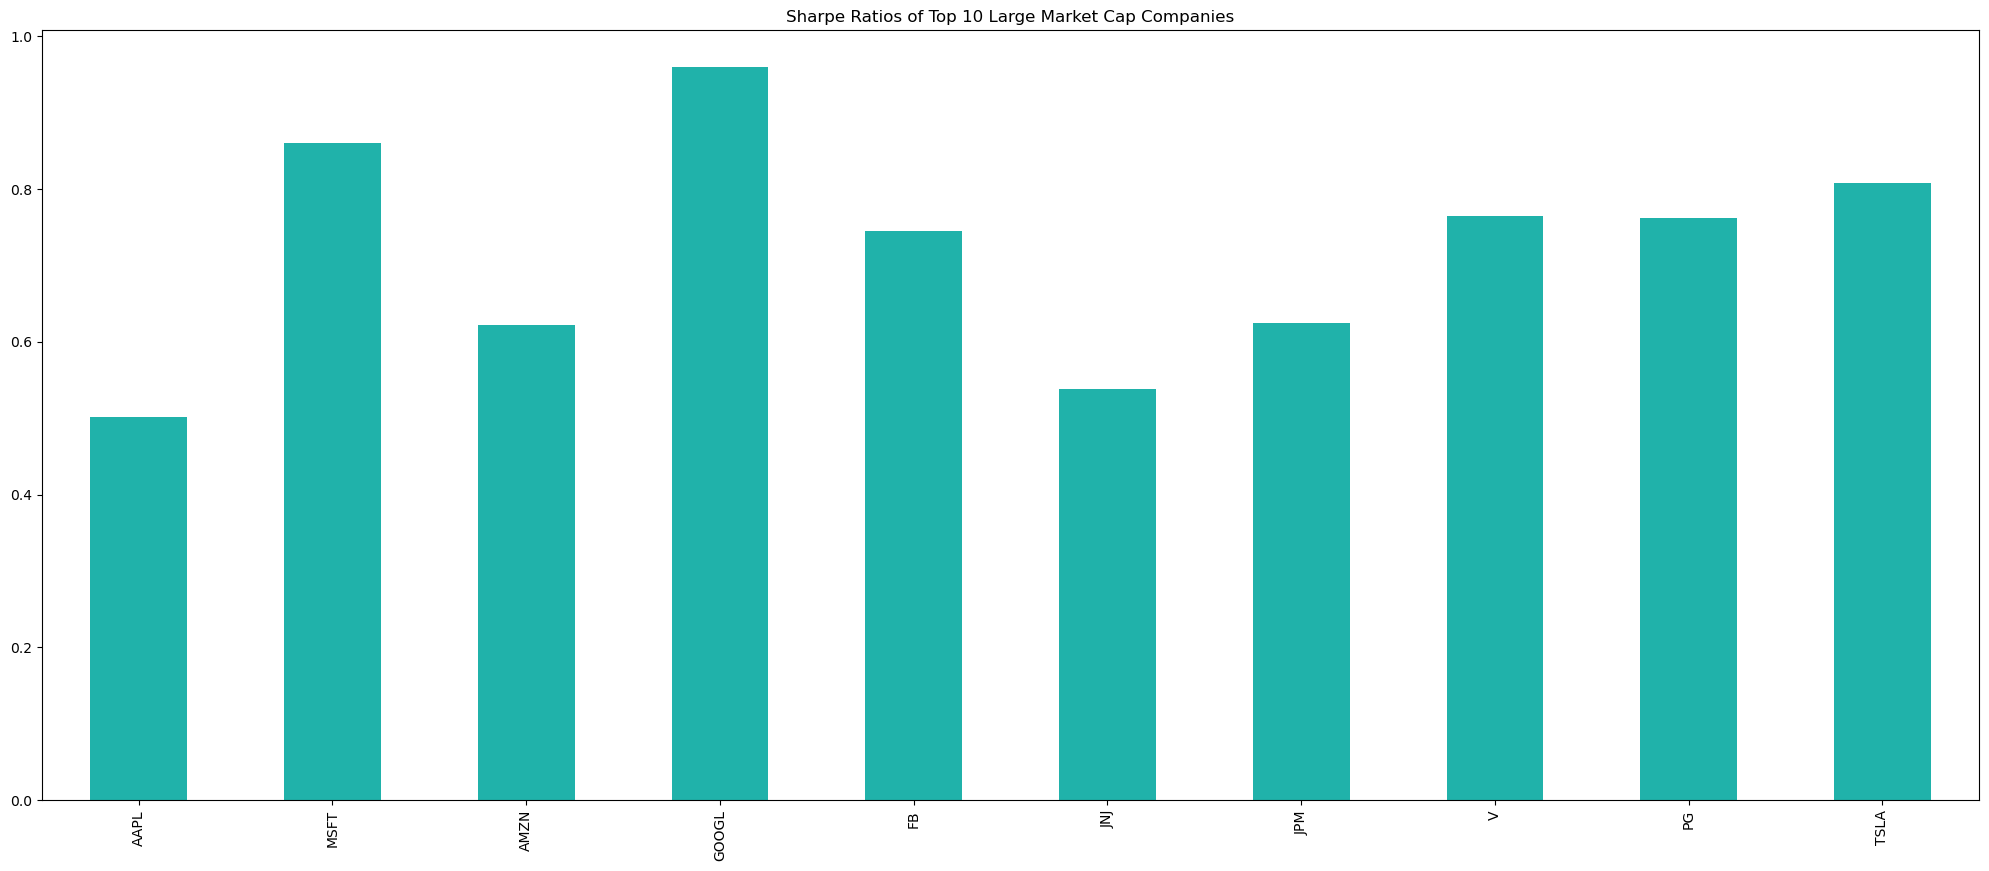

In [122]:
sharpe_ratios.plot.bar (figsize = (25, 10), title = "Sharpe Ratios of Top 10 Large Market Cap Companies", color = "lightseagreen")

In [106]:
import random
import pandas as pd

tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "FB", "JNJ", "JPM", "V", "PG", "TSLA"]

random_tickers = random.sample(tickers, 3)

print(random_tickers)


['AAPL', 'TSLA', 'AMZN']


In [107]:
selected_portfolio = pd.concat([df_portfolio[ticker] for ticker in random_tickers], axis=1, keys=random_tickers)

In [108]:
from MCForecastTools import MCSimulation

MC_even_weight = MCSimulation(
    portfolio_data = selected_portfolio,
    weights = [.3, .3, .4],
    num_simulation = 100,
    num_trading_days = 252*5
)

display(MC_even_weight.portfolio_data.head())
display(MC_even_weight.portfolio_data.tail())

AAPL                                    \
                             open    high     low   close    volume   
timestamp                                                             
2015-12-01 05:00:00+00:00  118.75  118.81  116.86  117.34  34852374   
2015-12-02 05:00:00+00:00  117.05  118.11  116.08  116.28  33385643   
2015-12-03 05:00:00+00:00  116.55  116.79  114.22  115.20  41560785   
2015-12-04 05:00:00+00:00  115.29  119.25  115.11  119.03  57776977   
2015-12-07 05:00:00+00:00  118.98  119.86  117.81  118.28  32080754   

                                                                  TSLA  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2015-12-01 05:00:00+00:00      187129  117.756760          NaN  231.06   
2015-12-02 05:00:00+00:00      180616  117.151198    -0.009034  237.00   
2015-12-03 05:00:00+00:00      245330  115.434888    -0.009288  235.48   
2015-12-04 05:00:00+00:00      307788  118.187290     0.033247  232.46   
2015-12-07 05:00:00+00:00      190809  118.509111    -0.006301  228.51   

                                   ...                             AMZN  \
                             high  ...        vwap daily_return    open   
timestamp                          ...                                    
2015-12-01 05:00:00+00:00  238.00  ...  235.229784          NaN  673.75   
2015-12-02 05:00:00+00:00  238.60  ...  234.840243    -0.021923  681.00   
2015-12-03 05:00:00+00:00  237.45  ...  234.006908     0.003104  679.06   
2015-12-04 05:00:00+00:00  233.27  ...  230.116350    -0.010012  666.00   
2015-12-07 05:00:00+00:00  235.63  ...  231.161332     0.003255  674.74   

                                                                         \
                              high     low   close   volume trade_count   
timestamp                                                                 
2015-12-01 05:00:00+00:00  681.000  667.86  679.06  4751152       58734   
2015-12-02 05:00:00+00:00  684.820  674.25  676.01  4273526       53343   
2015-12-03 05:00:00+00:00  682.790  661.48  666.25  5064736       63933   
2015-12-04 05:00:00+00:00  674.775  661.40  672.64  4534796       55448   
2015-12-07 05:00:00+00:00  675.460  660.50  669.83  3732814       46236   

                                                    
                                 vwap daily_return  
timestamp                                           
2015-12-01 05:00:00+00:00  675.745114          NaN  
2015-12-02 05:00:00+00:00  679.940598    -0.004492  
2015-12-03 05:00:00+00:00  671.538292    -0.014438  
2015-12-04 05:00:00+00:00  669.995283     0.009591  
2015-12-07 05:00:00+00:00  667.025599    -0.004178  

[5 rows x 24 columns]

AAPL                                    \
                              open    high     low   close    volume   
timestamp                                                              
2021-12-27 05:00:00+00:00  177.085  180.42  177.07  180.33  74928619   
2021-12-28 05:00:00+00:00  180.160  181.33  178.53  179.29  79103834   
2021-12-29 05:00:00+00:00  179.330  180.63  178.14  179.38  62325923   
2021-12-30 05:00:00+00:00  179.470  180.57  178.09  178.20  59770363   
2021-12-31 05:00:00+00:00  178.130  179.23  177.26  177.57  64038545   

                                                                     TSLA  \
                          trade_count        vwap daily_return       open   
timestamp                                                                   
2021-12-27 05:00:00+00:00      629427  179.056781     0.022975  1073.6700   
2021-12-28 05:00:00+00:00      631315  179.707003    -0.005767  1109.4900   
2021-12-29 05:00:00+00:00      491575  179.455692     0.000502  1098.6400   
2021-12-30 05:00:00+00:00      498610  179.374496    -0.006578  1061.3300   
2021-12-31 05:00:00+00:00      451475  177.800284    -0.003535  1073.4444   

                                      ...                               AMZN  \
                                high  ...         vwap daily_return     open   
timestamp                             ...                                      
2021-12-27 05:00:00+00:00  1117.0000  ...  1099.678598     0.025248  3420.74   
2021-12-28 05:00:00+00:00  1118.9999  ...  1093.394008    -0.005000  3403.65   
2021-12-29 05:00:00+00:00  1104.0000  ...  1084.736183    -0.002095  3416.80   
2021-12-30 05:00:00+00:00  1095.5500  ...  1077.500872    -0.014592  3394.00   
2021-12-31 05:00:00+00:00  1081.9999  ...  1067.185734    -0.012669  3379.12   

                                                                               \
                                high        low    close   volume trade_count   
timestamp                                                                       
2021-12-27 05:00:00+00:00  3458.8600  3384.3100  3393.39  2940934      198711   
2021-12-28 05:00:00+00:00  3443.5176  3382.7100  3413.22  2735302      161349   
2021-12-29 05:00:00+00:00  3424.2400  3372.0101  3384.02  1786454      130973   
2021-12-30 05:00:00+00:00  3417.7600  3370.4800  3372.89  1878291      128106   
2021-12-31 05:00:00+00:00  3387.0000  3331.1700  3334.34  2390092      140647   

                                                     
                                  vwap daily_return  
timestamp                                            
2021-12-27 05:00:00+00:00  3409.633423    -0.008178  
2021-12-28 05:00:00+00:00  3415.247098     0.005844  
2021-12-29 05:00:00+00:00  3387.536644    -0.008555  
2021-12-30 05:00:00+00:00  3393.661655    -0.003289  
2021-12-31 05:00:00+00:00  3350.026848    -0.011429  

[5 rows x 24 columns]

In [32]:
MC_even_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1          2         3         4         5         6   \
0     1.000000  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.988753  0.993889   1.013915  0.974618  1.002167  0.994194  1.004376   
2     0.999652  0.969178   1.028587  0.968445  1.021018  0.991564  1.004029   
3     1.011687  0.985105   1.037659  0.989205  1.027845  1.023243  0.987932   
4     1.026650  0.970583   1.034068  0.985389  1.023749  1.017199  0.993541   
...        ...       ...        ...       ...       ...       ...       ...   
1256  5.487184  4.990579  12.094587  6.239305  2.373039  3.587459  3.749934   
1257  5.598808  5.083184  12.423789  6.123583  2.454646  3.578723  3.713710   
1258  5.728636  4.973288  12.606864  6.100316  2.461399  3.539542  3.680290   
1259  5.755348  4.957900  12.301045  6.043171  2.538896  3.594660  3.576681   
1260  5.866258  4.987185  12.436528  6.179605  2.576031  3.614828  3.610697   

            7         8         9   ...        90        91        92  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.021028  1.000566  0.949023  ...  1.003675  1.019345  0.979319   
2     1.028134  0.977846  0.953054  ...  0.997611  1.010429  1.002035   
3     1.032505  0.987081  0.918584  ...  1.019746  0.993048  1.024429   
4     1.046675  0.980273  0.934938  ...  1.018513  0.979836  1.027727   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.624142  5.092063  2.262581  ...  1.926154  4.612869  3.347852   
1257  2.654595  4.993186  2.263657  ...  1.883832  4.668355  3.223048   
1258  2.673959  4.949192  2.271142  ...  1.889643  4.685718  3.227629   
1259  2.625250  5.002054  2.202199  ...  1.857787  4.670524  3.344165   
1260  2.596620  4.982587  2.197049  ...  1.857665  4.624262  3.280832   

            93        94        95        96        97        98        99  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.007800  0.986437  0.967025  1.001523  0.990886  0.999939  1.000770  
2     0.994043  0.997905  0.933768  1.001193  1.012686  1.009794  0.981859  
3     1.023195  1.011655  0.940213  0.981423  0.971006  1.023480  0.978073  
4     0.997962  1.001999  0.950567  0.991173  0.979481  1.041689  0.979648  
...        ...       ...       ...       ...       ...       ...       ...  
1256  4.123877  4.705441  2.592563  2.126117  3.098692  4.580242  3.337289  
1257  4.166197  4.630593  2.546199  2.165648  3.155763  4.707182  3.427637  
1258  4.127476  4.635774  2.528202  2.180426  3.209449  4.725369  3.268001  
1259  4.137253  4.587016  2.495069  2.176429  3.191996  4.645769  3.312892  
1260  4.261498  4.507950  2.504567  2.145888  3.215899  4.611555  3.326805  

[1261 rows x 100 columns]

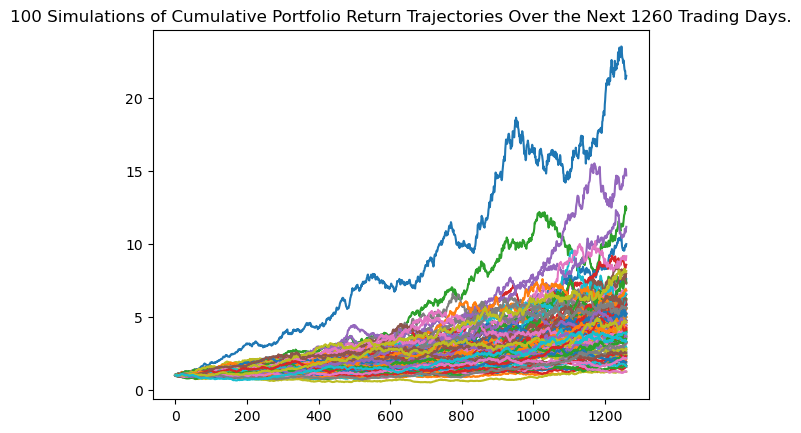

In [33]:
even_weight_line_plot = MC_even_weight.plot_simulation()

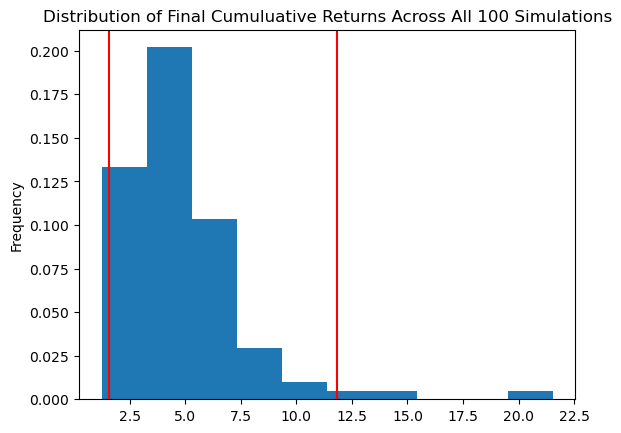

In [39]:
even_weight_distribution_plot = MC_even_weight.plot_distribution()

In [40]:
even_weight_table = MC_even_weight.summarize_cumulative_return()
print(even_weight_table)

count           100.000000
mean              4.856635
std               2.867844
min               1.235682
25%               3.214254
50%               4.344840
75%               5.800490
max              21.535108
95% CI Lower      1.578728
95% CI Upper     11.838549
Name: 1260, dtype: float64


C:\Users\zoeyli\Desktop\project-1\Stock-Investment-Analyzer\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [41]:

_amount = 10000
_years = 5

_ci_lower = round(even_weight_table[8] * _amount, 2)
_ci_upper = round(even_weight_table[9] * _amount, 2)

print(f"There is a 95% chance that an initial investment of ${_amount:,.2f} in the portfolio over the next {_years} years will end within in the range of ${_ci_lower:,.2f} and ${_ci_upper:,.2f}.")

There is a 95% chance that an initial investment of $10,000.00 in the portfolio over the next 5 years will end within in the range of $15,787.28 and $118,385.49.


['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'JNJ', 'JPM', 'V', 'PG', 'TSLA']

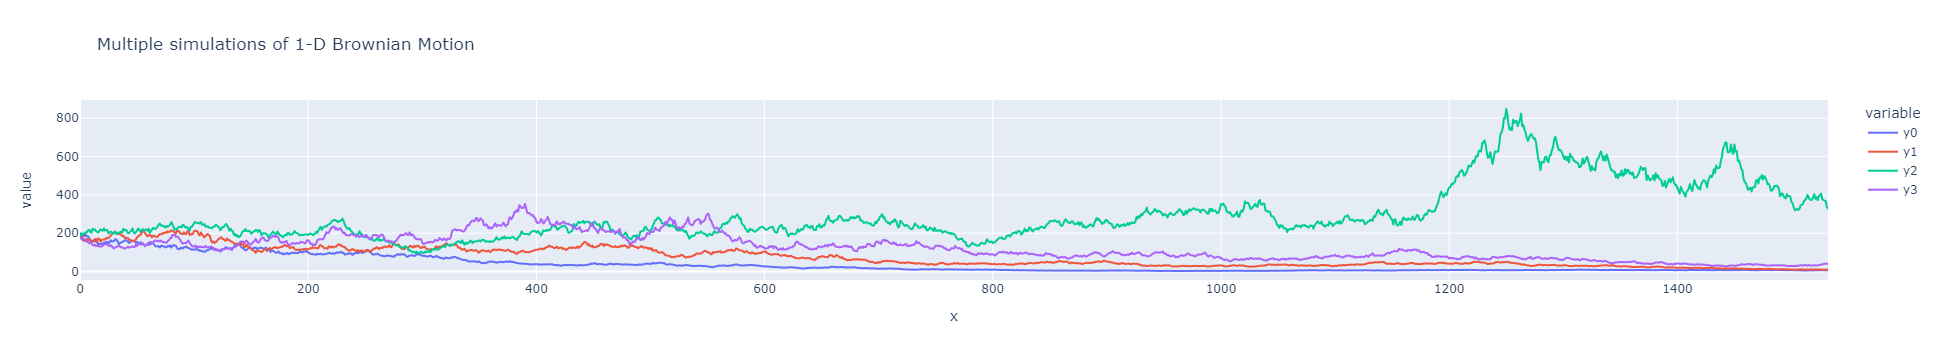

None

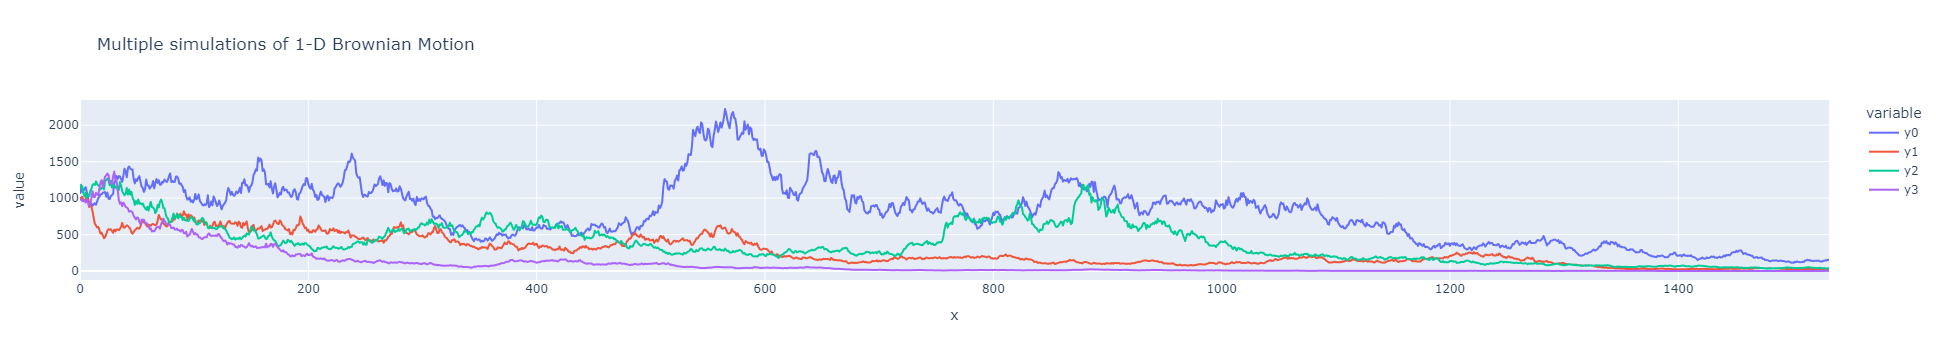

None

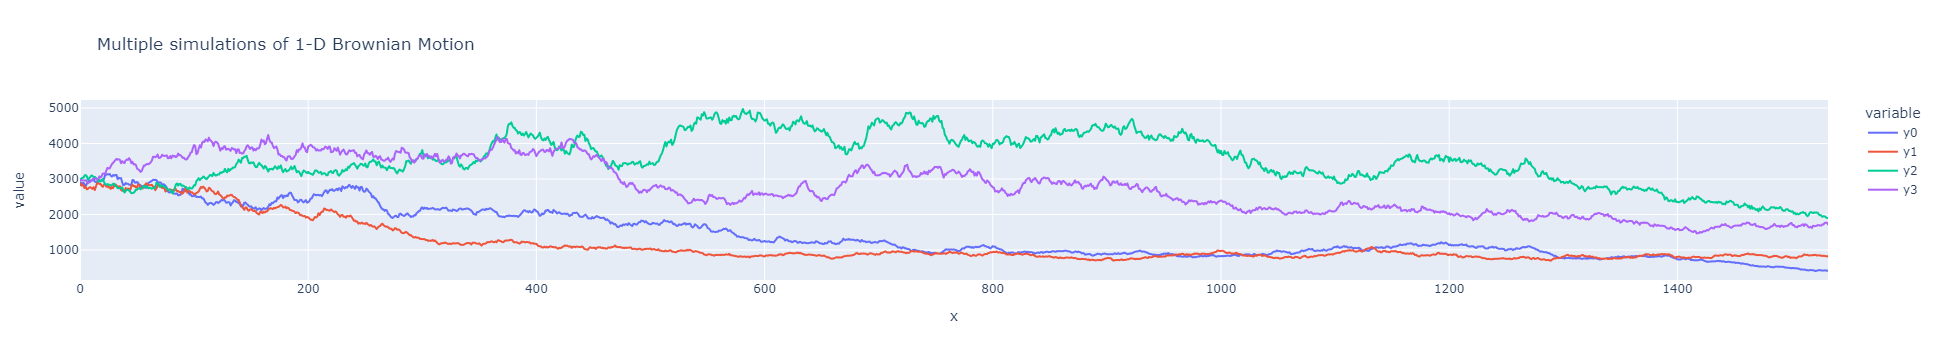

None

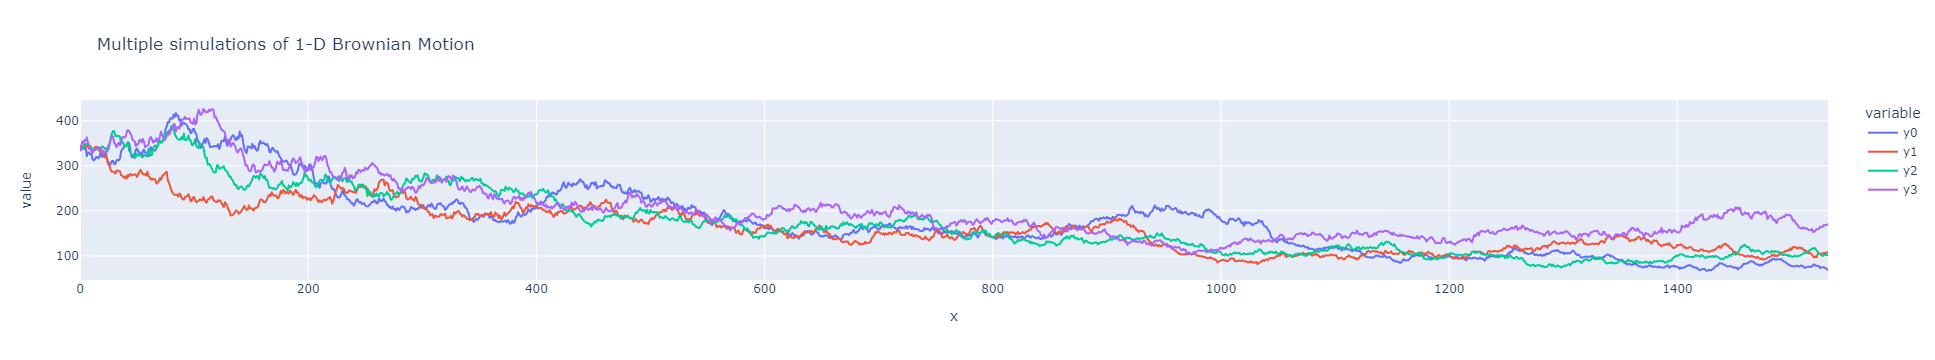

None

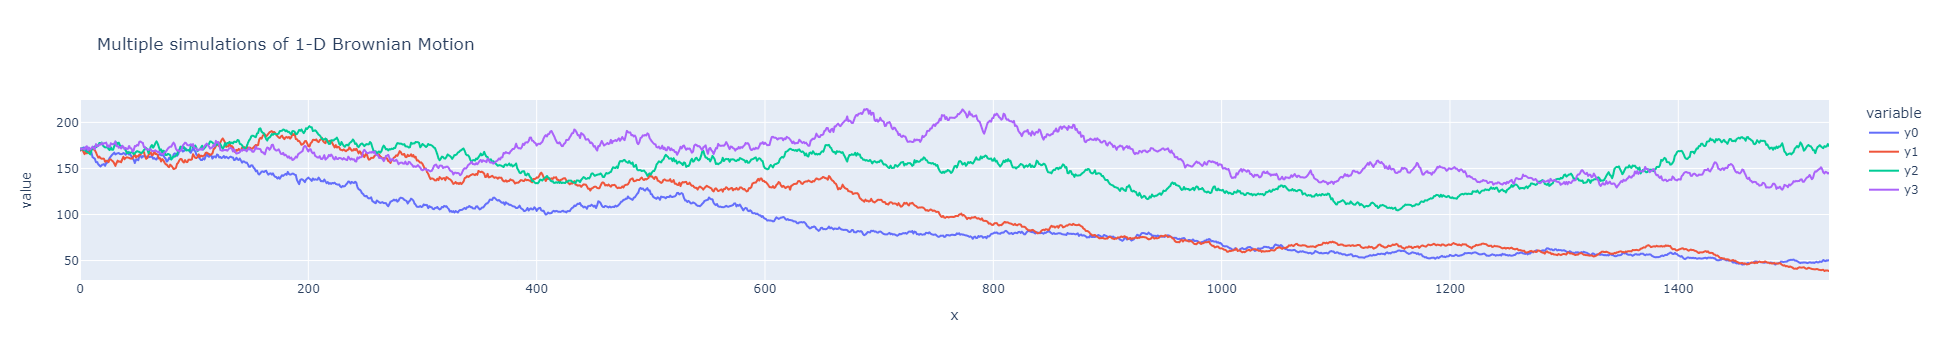

None

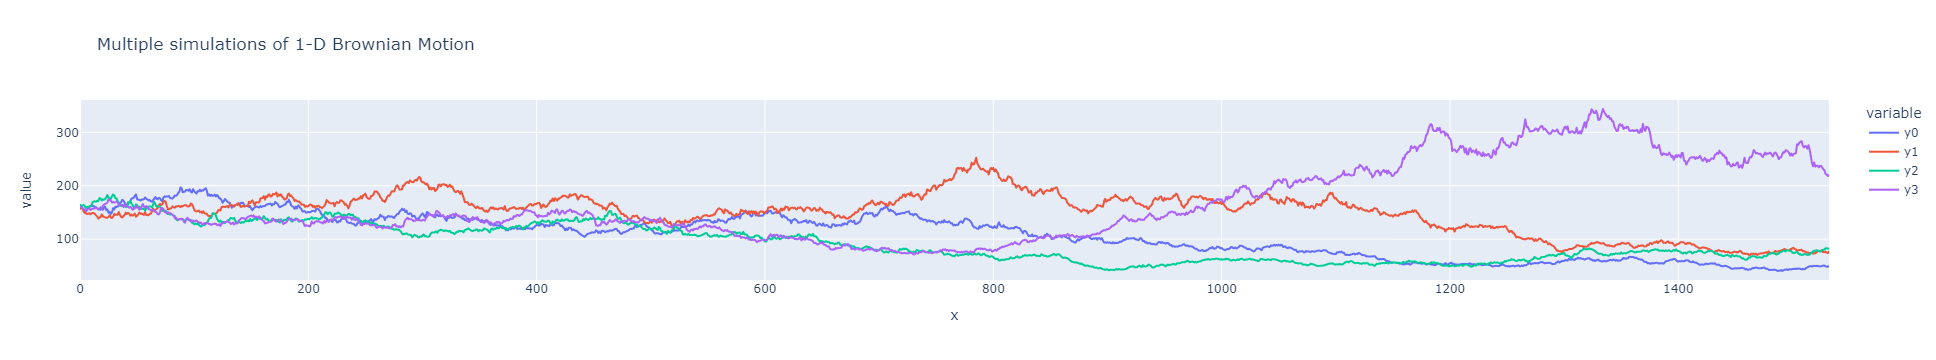

None

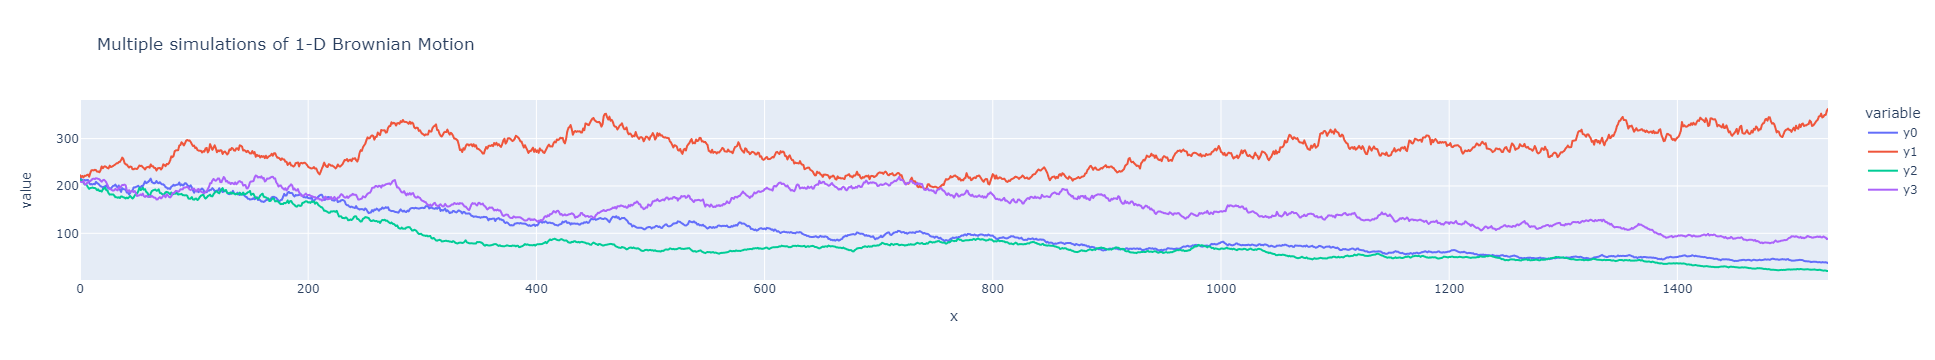

None

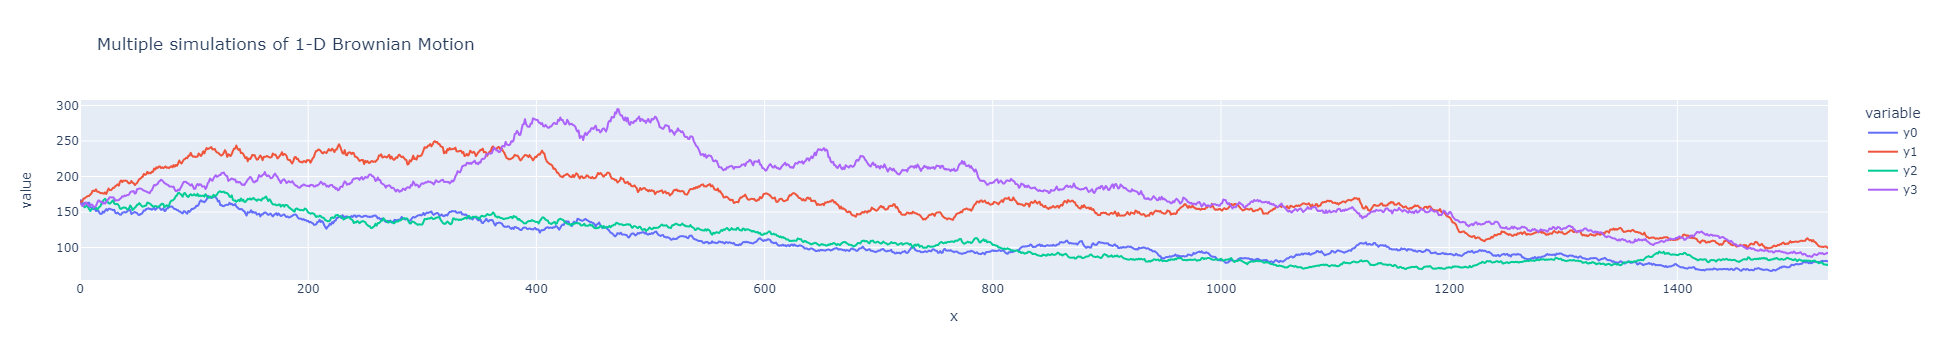

None

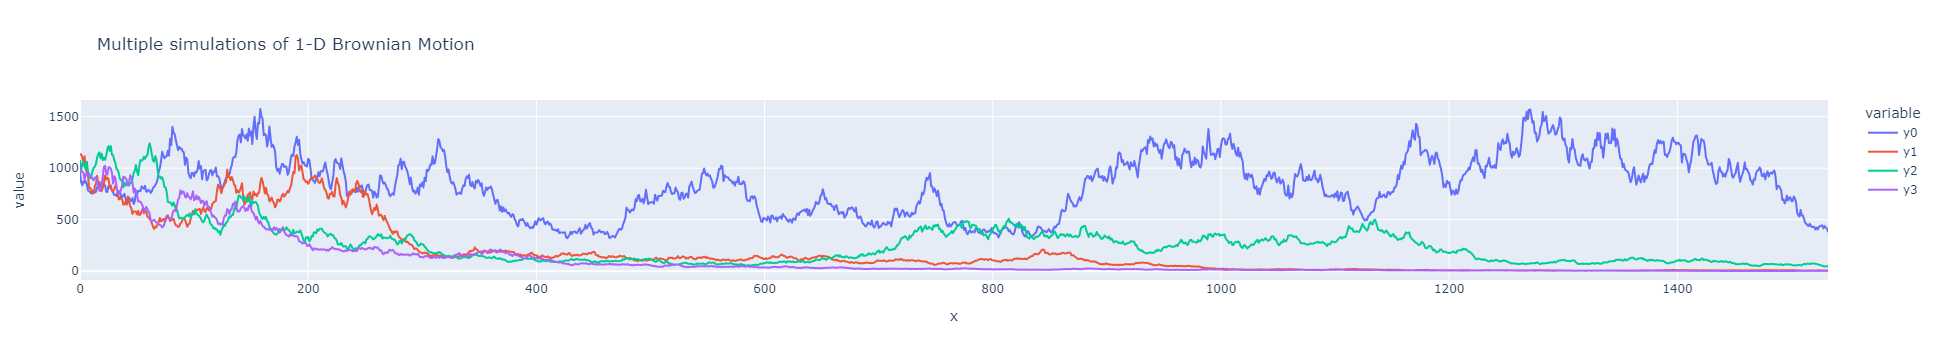

None

In [48]:
#
# GBM
#

import pandas_datareader.data as web
import numpy as np
import plotly.express as px
import random
import time


def simulate_1d_gbm(nsteps=1000, t=1, mu=0.0001, sigma=0.02, start=1):
    steps = [ (mu - (sigma**2)/2) + np.random.randn()*sigma for i in range(nsteps) ]
    y = start*np.exp(np.cumsum(steps))
    x = [ t*i for i in range(nsteps) ]
    return x, y

def zz(prices):
    logprices = np.log(prices)
    #display(len(logprices))
    #display(logprices)
    logreturns = logprices[1:] - logprices[:-1]
    #display(len(logreturns))
    #display(logreturns)
    mu = np.mean(logreturns)
    sigma = np.std(logreturns)
    nsteps = logprices.shape[0] # x
    #display(nsteps)             # x

    #display(prices[0])

    ###
    nsims = 4
    simulation_data = {}
    for i in range(nsims):
        x, y = simulate_1d_gbm(nsteps=nsteps, mu=mu, sigma=sigma, start=prices[0])
        simulation_data['y{col}'.format(col=i)] = y
        simulation_data['x'] = x

    ycols = [ 'y{col}'.format(col=i) for i in range(nsims) ]
    fig = px.line(simulation_data, x='x', y=ycols, title="Multiple simulations of 1-D Brownian Motion")
    fig.show()
    return

display(tickers)

import time
t = 0.5

display(zz(np.flip(df_portfolio ["AAPL"]["close"].values)))
time.sleep(t)
display(zz(np.flip(df_portfolio ["TSLA"]["close"].values)))
time.sleep(t)
display(zz(np.flip(df_portfolio ["GOOGL"]["close"].values)))
time.sleep(t)
display(zz(np.flip(df_portfolio ["FB"]["close"].values)))
time.sleep(t)
display(zz(np.flip(df_portfolio ["JNJ"]["close"].values)))
time.sleep(t)
display(zz(np.flip(df_portfolio ["JPM"]["close"].values)))
time.sleep(t)
display(zz(np.flip(df_portfolio ["V"]["close"].values)))
time.sleep(t)
display(zz(np.flip(df_portfolio ["PG"]["close"].values)))
time.sleep(t)
display(zz(np.flip(df_portfolio ["TSLA"]["close"].values)))


In [131]:
# Omega Ratio

import yfinance as yf
import pandas as pd
import numpy as np

# Define the portfolio weights
stocks = {
    'AAPL': 0.2,
    'MSFT': 0.1,
    'AMZN': 0.1,
    'GOOGL': 0.1,
    'JNJ': 0.1,
    'JPM': 0.1,
    'V': 0.1,
    'PG': 0.1,
    'TSLA': 0.1
}
# Randomly pick 3 stocks from the portfolio
random_stocks = np.random.choice(list(stocks.keys()), size=3, replace=False)

total_weight = 1.0
weights = {}
for stock in random_stocks:
    if stock == random_stocks[-1]:
        # Make sure the weights add up to 1.0
        weights[stock] = total_weight
    else:
        # Randomly assign a weight between 0 and the remaining total weight
        weight = np.random.uniform(0, total_weight)
        total_weight -= weight
        weights[stock] = weight


# Define the risk-free rate and target return
rf_rate = 0.02
target_return = 0.05

# Retrieve the historical daily stock prices for the portfolio
start_date = '2013-01-01'
end_date = '2023-01-01'
prices = yf.download(list(weights.keys()), start=start_date, end=end_date)['Adj Close']

# Calculate the daily returns for each stock
returns = prices.pct_change()

# Calculate the daily returns for the portfolio
portfolio_returns = (returns * np.array(list(weights.values()))).sum(axis=1)

# Calculate the threshold return for the Omega ratio
threshold_return = rf_rate + (target_return - rf_rate) * (portfolio_returns > 0).mean()

# Calculate the number of positive excess returns for the portfolio
num_positive_excess_returns = (portfolio_returns > threshold_return).sum()

# Calculate the number of negative excess returns for the portfolio
num_negative_excess_returns = (portfolio_returns < threshold_return).sum()

# Calculate the average positive excess return for the portfolio
average_positive_excess_return = (portfolio_returns[portfolio_returns > threshold_return] - threshold_return).mean()

# Calculate the average negative excess return for the portfolio
average_negative_excess_return = (threshold_return - portfolio_returns[portfolio_returns < threshold_return]).mean()

# Calculate the Omega ratio
omega_ratio = (num_positive_excess_returns / num_negative_excess_returns) * (1 + average_positive_excess_return / average_negative_excess_return) - 1

print('Selected stocks:', random_stocks)
print('Portfolio weights:', weights)
print('Omega ratio: {:.2%}'.format(omega_ratio))


[*********************100%***********************]  3 of 3 completed
Selected stocks: ['PG' 'MSFT' 'AAPL']
Portfolio weights: {'PG': 0.9938863620123011, 'MSFT': 0.004507154737382063, 'AAPL': 0.001606483250316865}
Omega ratio: -96.13%
